# Spectral Estimation of Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

In the preceding sections various statistical measures have been introduced to characterize random processes and signals. For instance, the probability density function (PDF) $p_x(\theta)$, the mean value $\mu_x$, the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$ and its Fourier transformation, the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. For many random processes whose internal structure is known, these measures can be derived in closed-form. However, for practical random signals measures of interest have to be estimated from a limited number of samples. These estimated quantities can e.g. be used to fit a parametric model of the random process or as parameters in algorithms.

### Problem Statement

The estimation of the spectral properties of a random signal is of special interest for spectral analysis. The discrete Fourier transform (DFT) of a random signal is also random. It is not very well suited to gain insights into the average spectral structure of a random signal. We aim at estimating the PSD $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a wide-sense stationary (WSS) and ergodic process from a limited number of samples. This is known as [*spectral (density) estimation*](https://en.wikipedia.org/wiki/Spectral_density_estimation). Many techniques have been developed for this purpose. They can be classified into

1. non-parametric and
2. parametric

techniques. Non-parametric techniques estimate the PSD of the random signal without assuming any particular structure for the generating random process. In contrary, parametric techniques assume that the generating random process can be modeled by a few parameters. Their aim is to estimate these parameters in order to characterize the spectral properties of the random signal.

### Evaluation

Various measures have been introduced in order to evaluate the performance of a particular estimation technique. The estimate $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ can be regarded as a random signal itself. The performance of an estimator is therefore evaluated in a statistical sense. For the PSD, the following metrics are of interest

#### Bias

The [bias of an estimator](https://en.wikipedia.org/wiki/Estimator#Bias) 

\begin{equation}
b_{\hat{\Phi}_{xx}}  
= E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) - \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\}
= E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} - \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

quantifies the difference between the estimated $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the true $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. An estimator is 
* biased if $b_{\hat{\Phi}_{xx}} \neq 0$ and 
* bias-free if $b_{\hat{\Phi}_{xx}} = 0$.

#### Variance

The [variance of an estimator](https://en.wikipedia.org/wiki/Estimator#Variance)

\begin{equation}
\sigma^2_{\hat{\Phi}_{xx}} = E \left\{ \left(\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) - E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\} \right)^2 \right\}
\end{equation}

quantifies its quadratic deviation from its mean value $E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})\}$.

#### Consistency

A [consistent estimator](https://en.wikipedia.org/wiki/Estimator#Consistency) is an estimator for which the following conditions hold for a large number $N$ of samples:

1. the estimator is unbiased
    $$ \lim_{N \to \infty} b_{\hat{\Phi}_{xx}} = 0 $$

2. its variance converges towards zero
    $$ \lim_{N \to \infty} \sigma^2_{\hat{\Phi}_{xx}} = 0 $$
    
3. it converges in probability to the true $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$
    $$ \lim_{N \to \infty} \Pr \left\{ | \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) -  \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})| > \alpha \right\} = 0$$
    where $\alpha > 0$ denotes a (small) constant.

The last condition ensures that a consistent estimator does not generate outliers. Consistency is a desired property of an estimator. It ensures that if the number of samples $N$ increases towards infinity, the resulting estimates converges towards the true PSD.

#### Example - Discrete Fourier transform of sample functions

The following example computes and plots the magnitude of the discrete Fourier transform (DFT) $|X_n[\mu]|$ of an ensemble of random signals $x_n[k]$. In the plot, each color denotes one sample function and $\Omega[\mu] = \frac{2 \pi}{N} \mu$ where $N$ denotes the length of the sample function. The magnitude spectra are plotted as continuous signals for ease of illustration.

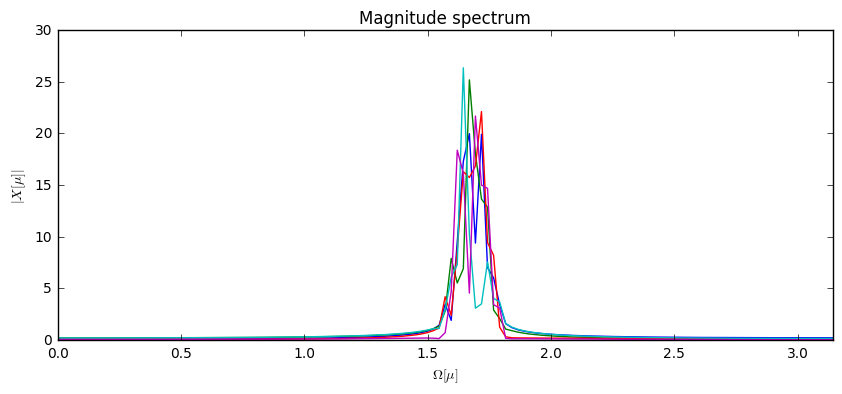

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 256  # number of samples
M = 5  # number of sample functions

# generate random signal
np.random.seed(1)
x = np.random.normal(size=(M, N))
h = sig.firwin2(N, [0, .5, .52, .55, .57, 1], [0, 0, 1, 1, 0, 0])
x = [np.convolve(xi, h, mode='same') for xi in x]

# DFT of signal
X = np.fft.rfft(x, axis=1)
Om = np.linspace(0, np.pi, X.shape[1])

# plot signal and its spectrum
plt.figure(figsize=(10,4))
plt.plot(Om, np.abs(X.T))
plt.title('Magnitude spectrum')
plt.xlabel(r'$\Omega[\mu]$')
plt.ylabel(r'$|X[\mu]|$')
plt.axis([0, np.pi, 0, 30]);

**Exercise**

* Increase the number `N` of samples. What changes? What does not change with respect to the evaluation criteria introduced above?
* Is the DFT of a single sample function a consistent estimator for the spectral properties of a random process?

Increasing the number of samples does only lead to an increase in the number of discrete frequencies $\mu$. The amplitude of the fluctuations (variance) of the spectra within $1.5 < \Omega < 1.8$ is not decreased when increasing the number of samples. The DFT of a single sample function is hence not a consistent estimator since at least the second condition is violated.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.